In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from utils import (
    load_npz_files,
    z_score_norm,
    session_wise_grouping,
    make_binary_label,
    make_multi_label,
)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
data_file_path = "../data/aligned_data/aligned_data_20250224"
data_list = load_npz_files(data_file_path)

In [3]:
feature, timepoint, session_mask, groups, steering, location, velocity = session_wise_grouping(data_list)
feature = z_score_norm(feature)

label_binary = make_binary_label(steering)
split_list = [-1, -0.1, 0.1, 1]
label_multi = make_multi_label(steering, split_list)

feature_flat = feature.reshape(feature.shape[0], -1)

In [4]:
lda_1 = LDA(n_components=1)
feature_lda_binary = lda_1.fit_transform(feature_flat, label_binary)

/tmp/ipykernel_2107167/1793905005.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_binary[label_binary == 0], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
/tmp/ipykernel_2107167/1793905005.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_binary[label_binary == 1], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')


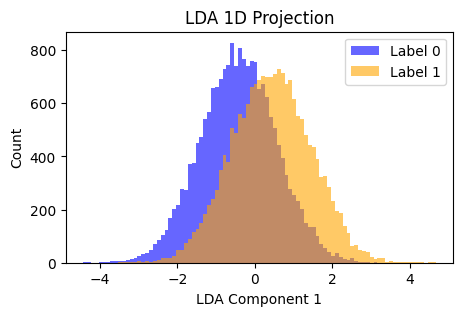

In [5]:
plt.figure(figsize=(5,3))
step_len = 0.1
plt.hist(feature_lda_binary[label_binary == 0], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
plt.hist(feature_lda_binary[label_binary == 1], bins=np.arange(min(feature_lda_binary), max(feature_lda_binary) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')
plt.xlabel('LDA Component 1')
plt.ylabel('Count')
plt.title('LDA 1D Projection')
plt.legend()
plt.show()

In [6]:
lda_1 = LDA(n_components=1)
feature_lda_multi_1d = lda_1.fit_transform(feature_flat, label_multi)

/tmp/ipykernel_2107167/3112532335.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_multi_1d[label_multi == 0], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
/tmp/ipykernel_2107167/3112532335.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(feature_lda_multi_1d[label_multi == 1], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')
/tmp/ipykernel_2107167/3112532335.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar

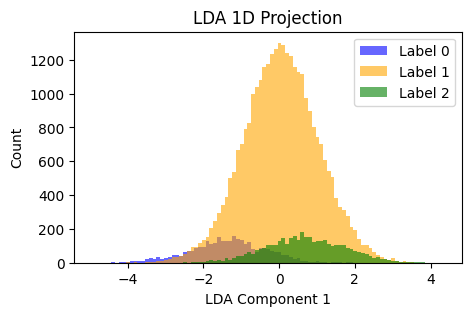

In [7]:
plt.figure(figsize=(5,3))
step_len = 0.1
plt.hist(feature_lda_multi_1d[label_multi == 0], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='blue', alpha=0.6, label='Label 0')
plt.hist(feature_lda_multi_1d[label_multi == 1], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='orange', alpha=0.6, label='Label 1')
plt.hist(feature_lda_multi_1d[label_multi == 2], bins=np.arange(min(feature_lda_multi_1d), max(feature_lda_multi_1d) + step_len, step_len), color='green', alpha=0.6, label='Label 2')
plt.xlabel('LDA Component 1')
plt.ylabel('Count')
plt.title('LDA 1D Projection')
plt.legend()
plt.show()

In [8]:
lda_2 = LDA(n_components=2)
feature_lda_multi_2d = lda_2.fit_transform(feature_flat, label_multi)

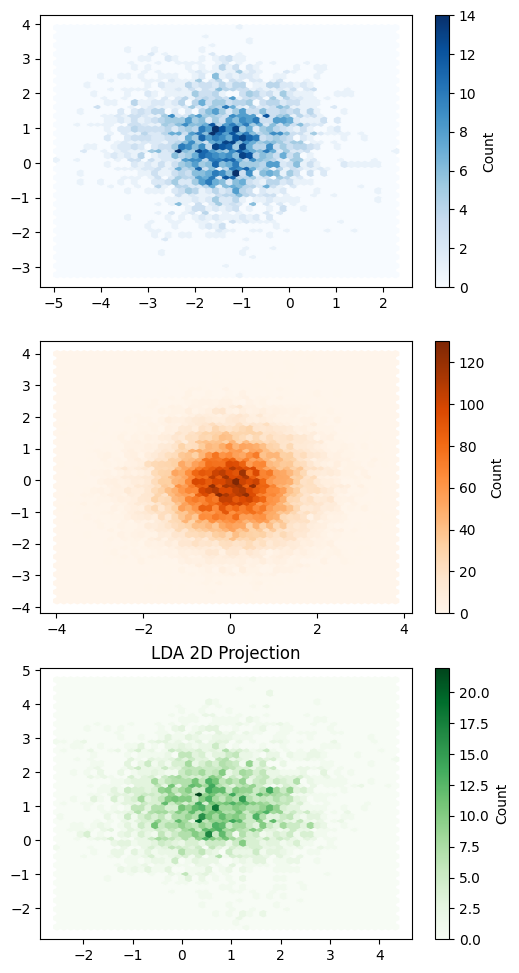

In [9]:
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)
plt.hexbin(feature_lda_multi_2d[label_multi == 0, 0], feature_lda_multi_2d[label_multi == 0, 1], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')

plt.subplot(3, 1, 2)
plt.hexbin(feature_lda_multi_2d[label_multi == 1, 0], feature_lda_multi_2d[label_multi == 1, 1], gridsize=50, cmap='Oranges')
plt.colorbar(label='Count')

plt.subplot(3, 1, 3)
plt.hexbin(feature_lda_multi_2d[label_multi == 2, 0], feature_lda_multi_2d[label_multi == 2, 1], gridsize=50, cmap='Greens')
plt.colorbar(label='Count')

plt.title('LDA 2D Projection')
plt.show()

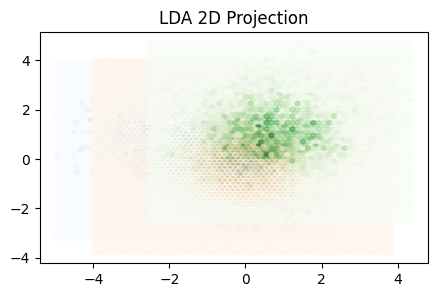

In [10]:
plt.figure(figsize=(5, 3))
plt.hexbin(feature_lda_multi_2d[label_multi == 0, 0], feature_lda_multi_2d[label_multi == 0, 1], gridsize=50, alpha=0.6, cmap='Blues')
plt.hexbin(feature_lda_multi_2d[label_multi == 1, 0], feature_lda_multi_2d[label_multi == 1, 1], gridsize=50, alpha=0.6, cmap='Oranges')
plt.hexbin(feature_lda_multi_2d[label_multi == 2, 0], feature_lda_multi_2d[label_multi == 2, 1], gridsize=50, alpha=0.6, cmap='Greens')

plt.title('LDA 2D Projection')
plt.show()